In [2]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:

df = pd.read_csv('../input/cars.csv')

df.columns = df.columns.str.replace(' ', '')

In [4]:

df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [5]:
le = LabelEncoder().fit(df['brand'])
df['brand'] = le.transform(df['brand'])


df = df.loc[df.cubicinches != ' ']
df = df.loc[df.weightlbs != ' ']


df[['cubicinches', 'weightlbs']] = df[['cubicinches', 'weightlbs']].astype(int)

In [6]:

L = list(le.inverse_transform(df['brand']))
d = dict(zip(le.classes_, le.transform(le.classes_)))
print (d)

{' Europe.': 0, ' Japan.': 1, ' US.': 2}


In [7]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 0 to 260
Data columns (total 8 columns):
mpg            256 non-null float64
cylinders      256 non-null int64
cubicinches    256 non-null int64
hp             256 non-null int64
weightlbs      256 non-null int64
time-to-60     256 non-null int64
year           256 non-null int64
brand          256 non-null int64
dtypes: float64(1), int64(7)
memory usage: 18.0 KB


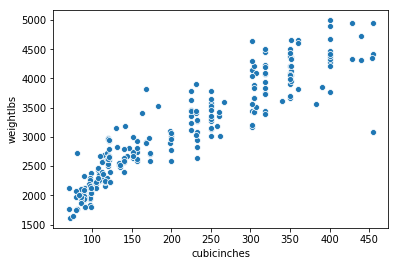

In [27]:
sns.scatterplot(df.cubicinches,df.weightlbs)

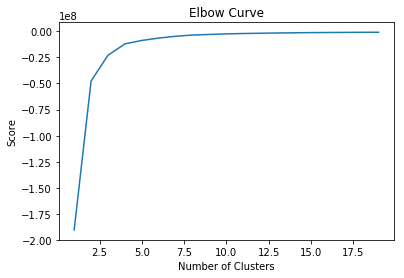

In [9]:

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [20]:

kmeans = KMeans(n_clusters=3, random_state=0).fit(df)

In [21]:

df['cluster'] = kmeans.labels_

In [22]:
df.loc[df.cluster == 0].count()

mpg            118
cylinders      118
cubicinches    118
hp             118
weightlbs      118
time-to-60     118
year           118
brand          118
cluster        118
dtype: int64

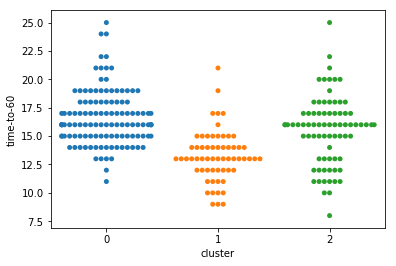

In [18]:
sns.swarmplot(df.cluster,df['time-to-60'])